<a href="https://colab.research.google.com/github/le11nguyen/AIO-Exercise/blob/main/M4W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib . pyplot as plt
import random
random . seed (0) # please do not remove this line
%matplotlib inline

def load_data_from_file ( fileName = "/content/Advertising.csv") :
  data = np . genfromtxt ( fileName , dtype = None , delimiter =',', skip_header =1)
  features_X = data [: , :3]
  sales_Y = data [: , 3]
  features_X = np.column_stack((np.ones(features_X.shape[0]), features_X))

  return features_X , sales_Y

In [19]:
# Question 2
features_X , _ = load_data_from_file ()
print ( features_X [:5 ,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [20]:
# Question 3
_ , sales_Y = load_data_from_file ()
print ( sales_Y . shape )

(200,)


In [23]:
def create_individual(n=4, bound=10):
    individual = [random.uniform(-bound/2, bound/2) for _ in range(n)]
    return individual

In [25]:
individual = create_individual ()
print ( individual )

[-0.23403045847644144, 0.8338203945503118, 4.081128851953352, 0.046868558173902564]


In [26]:
features_X , sales_Y = load_data_from_file ()
def compute_loss ( individual ) :
  theta = np . array ( individual )
  y_hat = features_X . dot ( theta )
  loss = np . multiply (( y_hat - sales_Y ) , ( y_hat - sales_Y ) ) . mean ()
  return loss


def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)
    return fitness_value

In [28]:
# Question 4
features_X , sales_Y = load_data_from_file ()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness ( individual )
print ( fitness_score )

1.0185991537088997e-06


In [31]:
def crossover ( individual1 , individual2 , crossover_rate = 0.9) :
  individual1_new = individual1 . copy ()
  individual2_new = individual2 . copy ()

  individual1_new = individual2 if random . random () < crossover_rate else individual1
  individual2_new = individual1 if random . random () < crossover_rate else individual2

  return individual1_new , individual2_new

In [32]:
# question 5
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [33]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] += random.gauss(0, 0.1)
    return individual_m

In [34]:
# Question 6
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 2.0)
print ( before_individual == after_individual )

False


In [37]:
def initializePopulation ( m ) :
  population = [ create_individual() for _ in range ( m ) ]
  return population

In [38]:
def selection ( sorted_old_population , m = 100) :
  index1 = random . randint (0 , m -1)
  while True :
    index2 = random . randint (0 , m -1)
    if ( index2 != index1 ) :
      break
  individual_s = sorted_old_population [ index1 ]
  if index2 > index1 :
    individual_s = sorted_old_population [ index2 ]
  return individual_s

In [39]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)
    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromosome:", sorted_population[m-1])
    new_population = []
    while len(new_population) < m - elitism:
        # selection
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)
        # crossover
        child1, child2 = crossover(parent1, parent2)
        # mutation
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m - elitism:]:
        new_population.append(ind.copy())
    return new_population, compute_loss(sorted_population[m-1])

In [40]:
# Question 7
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss: 123415.051528805 with chromosome: [3.44, 2.57, -0.79, -2.41]


In [54]:
def run_GA():
    n_generations = 100
    m = 600
    global features_X, sales_Y
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    for i in range(n_generations):
        population, best_loss = create_new_population(population, elitism=2, gen=i)
        losses_list.append(best_loss)
    return losses_list

In [57]:
import matplotlib . pyplot as plt
import matplotlib . pyplot as plt

def visualize_loss(losses_list):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(losses_list)), losses_list)
    plt.xlabel('Generation')
    plt.ylabel('Best Loss')
    plt.title('Best Loss per Generation')
    plt.show()


Best loss: 2037.5276462323482 with chromosome: [-4.465653981877611, -0.07876788137250568, 1.0371792383153533, -1.0096952033757702]
Best loss: 1864.8858139995468 with chromosome: [-4.465653981877611, -0.07876788137250568, 1.0371792383153533, -0.9522378994829244]
Best loss: 1864.8858139995468 with chromosome: [-4.465653981877611, -0.07876788137250568, 1.0371792383153533, -0.9522378994829244]
Best loss: 1864.8858139995468 with chromosome: [-4.465653981877611, -0.07876788137250568, 1.0371792383153533, -0.9522378994829244]
Best loss: 1238.3200225274506 with chromosome: [-4.465653981877611, -0.07876788137250568, 1.0371792383153533, -0.7096661068993178]
Best loss: 754.7897900222551 with chromosome: [-4.395525120358371, 0.061664764465268446, 1.0371792383153533, -1.0096952033757702]
Best loss: 754.7897900222551 with chromosome: [-4.395525120358371, 0.061664764465268446, 1.0371792383153533, -1.0096952033757702]
Best loss: 674.6694870790406 with chromosome: [-4.395525120358371, 0.0284337412116778

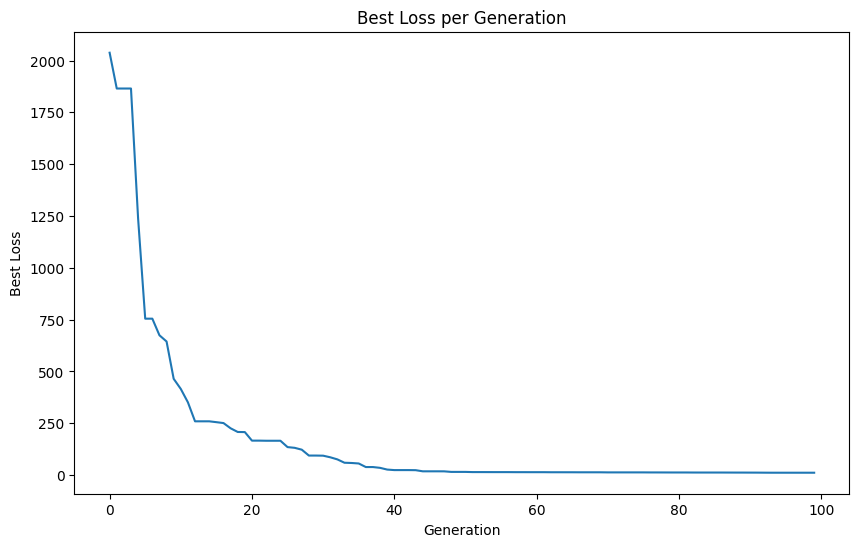

In [58]:
losses_list = run_GA ()
visualize_loss ( losses_list )

[-1.018446283119967, -0.013360003567067125, -0.5023357352384519, 0.3744775740363355]


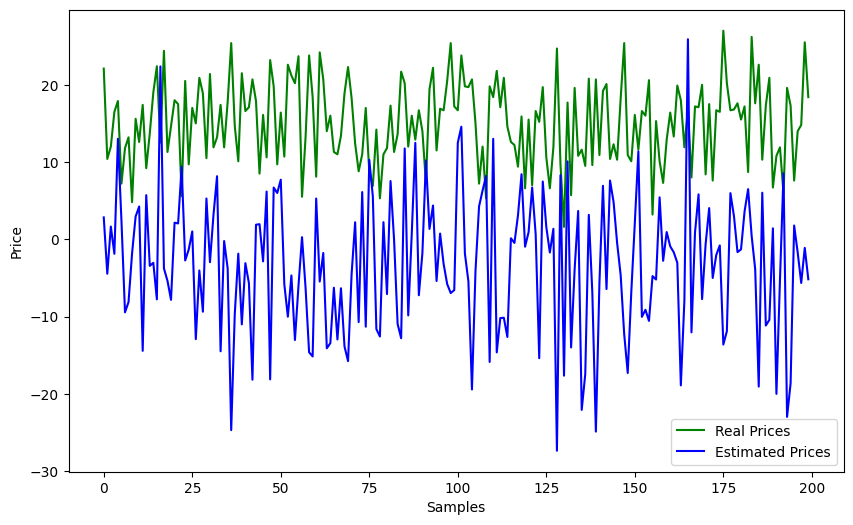

In [65]:
def visualize_predict_gt () :
  # visualization of ground truth and predict value
  sorted_population = sorted ( initializePopulation (600 ) , key = compute_fitness )
  print ( sorted_population [ -1])
  theta = np . array ( sorted_population [ -1])
  estimated_prices = []
  for feature in features_X :
    estimated_price = np.dot(feature, theta)
    estimated_prices.append(estimated_price)
  fig , ax = plt . subplots ( figsize =(10 , 6) )
  plt . xlabel (  'Samples' )
  plt . ylabel ( 'Price' )
  plt . plot ( sales_Y , c =  'green'  , label =  'Real Prices' )
  plt . plot ( estimated_prices , c =  'blue'  , label = 'Estimated Prices' )
  plt . legend ()
  plt . show ()
visualize_predict_gt ()